In [16]:
!pip install txtai[all] onnxruntime ipyplot librosa>> /dev/null

The Text To Speech pipeline generates speech from text.

The Transcription does the opposite and generate text from speech

In [4]:
%%capture

from txtai.pipeline import TextToSpeech

# Create text-to-speech model
tts = TextToSpeech()

In [5]:
import soundfile as sf

# Generate speech
speech = tts("Say something here")

# Write to file
sf.write("out.wav", speech, 22050)

In [ ]:
from txtai.pipeline import TextToSpeech

# Create text-to-speech model
tts = TextToSpeech("NeuML/ljspeech-jets-onnx")

In [7]:
import soundfile as sf

# Generate speech
speech = tts("Say something here")

In [8]:
from IPython.display import Audio, display

import os

import soundfile as sf

def play(speech):
  # Convert to MP3 to save space
  sf.write("speech.wav", speech, 22050)
  !ffmpeg -i speech.wav -y -b:a 64 speech.mp3 2> /dev/null

  # Play speech
  display(Audio(filename="speech.mp3"))

play(speech)

In [ ]:
from txtai.pipeline import Transcription

# Transcribe files
transcribe = Transcription("openai/whisper-base")

# Print result
transcribe(speech, 22050)

The Segmentation pipeline segments text into semantic units.

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
from txtai.pipeline import Segmentation

# Create and run pipeline
segment = Segmentation(sentences=True)
segment("This is a test. And another test.")

['This is a test.', 'And another test.']

The **Tabular pipeline** splits tabular data into rows and columns. The tabular pipeline is most useful in creating (id, text, tag) tuples to load into Embedding indexe

In [9]:
%%capture
# Get a csv file
!wget https://github.com/insightbuilder/python_de_learners_data/blob/main/code_script_notebooks/projects/chatgpt_nbs/space_titanic.csv
!head -1 space_titanic.csv > input.csv
!tail -100 space_titanic.csv >> input.csv

In [10]:
from txtai.pipeline import Tabular

# Create and run pipeline
tabular = Tabular("PassengerId", ["HomePlanet"])
tabular("/content/space_titanic.csv")

ParserError: ignored

The Textractor pipeline extracts and splits text from documents. This pipeline uses either an Apache Tika backend (if Java is available) or BeautifulSoup4.

In [12]:
from txtai.pipeline import Textractor

# Create and run pipeline
textract = Textractor()
textract("https://github.com/neuml/txtai")

2023-04-22 08:57:47,289 [MainThread  ] [INFO ]  Retrieving https://github.com/neuml/txtai to /tmp/neuml-txtai.
INFO:tika.tika:Retrieving https://github.com/neuml/txtai to /tmp/neuml-txtai.


'GitHub - neuml/txtai: 💡 Semantic search and workflows powered by language models Skip to content Toggle navigation Sign up Product Actions Automate any workflow Packages Host and manage packages Security Find and fix vulnerabilities Codespaces Instant dev environments Copilot Write better code with AI Code review Manage code changes Issues Plan and track work Discussions Collaborate outside of code Explore All features Documentation GitHub Skills Blog Solutions For Enterprise Teams Startups Education By Solution CI/CD & Automation DevOps DevSecOps Case Studies Customer Stories Resources Open Source GitHub Sponsors Fund open source developers The ReadME Project GitHub community articles Repositories Topics Trending Collections Pricing In this repository All GitHub ↵ Jump to ↵ No suggested jump to results In this repository All GitHub ↵ Jump to ↵ In this organization All GitHub ↵ Jump to ↵ In this repository All GitHub ↵ Jump to ↵ Sign in Sign up {{ message }} neuml / txtai Public Notif

The caption pipeline reads a list of images and returns a list of captions for those images.

In [13]:
%%capture

from txtai.pipeline import Caption

# Create caption pipeline
caption = Caption()

No model was supplied, defaulted to ydshieh/vit-gpt2-coco-en and revision 65636df (https://huggingface.co/ydshieh/vit-gpt2-coco-en).
Using a pipeline without specifying a model name and revision in production is not recommended.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
# Get test data
!wget -N https://github.com/neuml/txtai/releases/download/v3.5.0/tests.tar.gz
!tar -xvzf tests.tar.gz

In [ ]:
import glob
import ipyplot

from PIL import Image

# Get list of images
images = glob.glob('txtai/*jpg')

# Generate captions
captions = caption(images)

# Show image/caption pairs
ipyplot.plot_images([Image.open(image) for image in images], 
                    captions, 
                    img_width=425, 
                    force_b64=True)
     

## Detect Object

In [ ]:
from txtai.pipeline import Objects

# Create objects pipeline
objects = Objects()

In [ ]:
# Detect objects
detected = objects(images)

In [24]:
detected

[[('clock', 0.9798957109451294)],
 [('bird', 0.9631725549697876)],
 [],
 [('vase', 0.9899459481239319)],
 [('motorcycle', 0.9991087317466736), ('person', 0.9842146635055542)],
 [],
 [],
 [],
 [('book', 0.9194084405899048)],
 [('cell phone', 0.9697791337966919)]]

The image hash pipeline generates perceptual image hashes. These hashes can be used to detect near-duplicate images. This method is not backed by machine learning models and not intended to find conceptually similar images.

In [18]:
import glob

from PIL import Image

from txtai.pipeline import ImageHash

def show(image):
  width, height = image.size
  return image.resize((int(width / 2.25), int((width / 2.25) * height / width)))

In [19]:
# Get and scale images
images = [Image.open(image) for image in glob.glob('txtai/*jpg')]

# Create image pipeline
ihash = ImageHash()

# Generate hashes
hashes = ihash(images)
hashes

['78f8f8d8f8f8f8f0',
 '60607072fe78cc00',
 '63263c183ce66742',
 'ff9d8140c070ffff',
 'ffffdf0700010100',
 '0000446c6f2f2724',
 '00000006fefcfc30',
 '000000c0feffff00',
 '0859dd04bfbfbf00',
 'ff9f010909010101']

In [25]:
# Get test image index
index = hashes.index('000000c0feffff00')

# Select portion of image
width, height = images[index].size

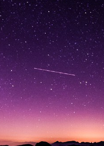

In [26]:
# Get dimensions for middle of image
left = (width - width/3)/2
top = (height - height/1.35)/2
right = (width + width/3)/2
bottom = (height + height/1.35)/2

# Crop image
search = images[index].crop((left, top, right, bottom))
show(search)

In [28]:
!pip install textdistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


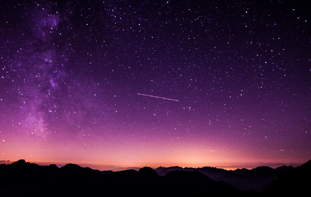

In [29]:
import textdistance

# Find closest image hash using textdistance
shash = ihash(search)

# Calculate distances for search hash
distances = [int(textdistance.levenshtein.distance(h, shash)) for h in hashes]

# Show closest image hash
low = min(distances)
show(images[distances.index(low)])

In [30]:
distances

[13, 13, 16, 10, 13, 11, 7, 5, 12, 13]

In [31]:
distances.index(low)

7